In [1]:
# !wget -b https://dsprojprudhvi.s3.amazonaws.com/DSCI6002_prj1_data.db
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# pd.set_option('mode.chained_assignment', None)

In [2]:
conn =  sqlite3.connect('data.db')
sql_data = conn.execute('select * from prj1')

df = pd.DataFrame(sql_data.fetchall(),columns=['index','EdLevel','Age'])

In [3]:
df.head(15)

,index,EdLevel,Age
0,0,Less than HS,26.0
1,1,Less than HS,43.8
2,2,Less than HS,34.4
3,3,Less than HS,76.2
4,4,Less than HS,0.2
5,5,Less than HS,32.5
6,6,Less than HS,53.1
7,7,Less than HS,29.6
8,8,Less than HS,39.8
9,9,Less than HS,43.1


In [4]:
df.isnull().value_counts()

index  EdLevel  Age  
False  False    False    1160
                True       11
dtype: int64

In [5]:
unique = list(df.EdLevel.unique())
age=[]
for i in unique:
    mean = round(df[df['EdLevel'] == i].Age.mean(),1)
    age.append(df[df['EdLevel'] == i].Age.fillna(mean))

df['Age'] = pd.concat(age)

In [6]:
df.isna().sum()

index      0
EdLevel    0
Age        0
dtype: int64

<AxesSubplot:xlabel='EdLevel', ylabel='Age'>

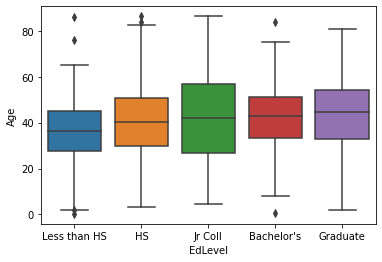

In [7]:
sns.boxplot(x='EdLevel',y='Age',data=df)

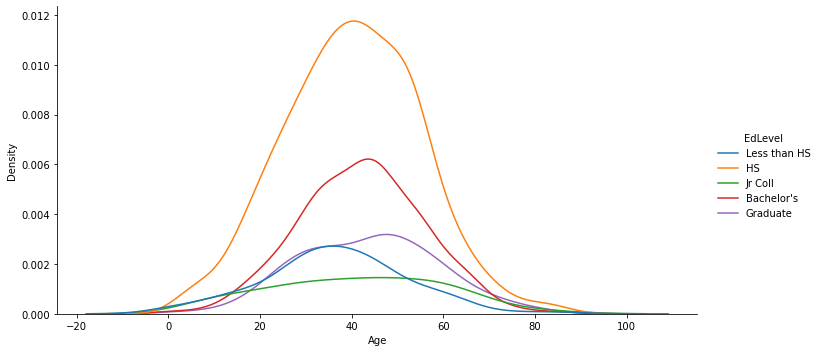

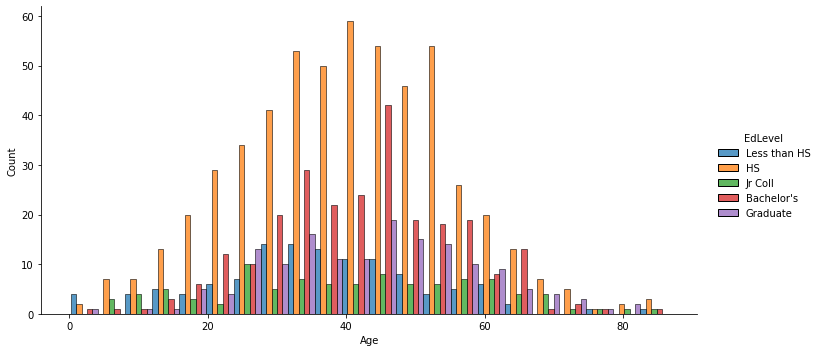

In [8]:
sns.displot(df,x='Age',hue='EdLevel',kind='kde',height=5,aspect=2)
sns.displot(df,x='Age',hue='EdLevel',multiple='dodge',height=5,aspect=2)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('Age~C(EdLevel)',data=df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.564
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00116
Time:                        09:20:08   Log-Likelihood:                -4830.6
No. Observations:                1171   AIC:                             9671.
Df Residuals:                    1166   BIC:                             9697.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     42.1304      0.943     44.659      0.000      40.280      43.981
C(EdLevel)[T.Graduate]         1.4818      1.531      0.968      0.333      -1.521       4.485
C(EdLevel)[T.HS]              -2.0075      1.141     -1.759      0.079      -4.247       0.231
C(EdLevel)[T.Jr Coll]         -1.1263      1.792     -0.629      0.530      -4.642       2.390
C(EdLevel)[T.Less than HS]    -5.6021      1.663     -3.368      0.001      -8.865      -2.339
==============================================================================
Omnibus:                        0.377   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.828   Jarque-Bera (JB):                0.445
Skew:                           0.035   Prob(JB):                        0.800
Kurtosis:                       2.935   Cond. No.                         6.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
anova_table = sm.stats.anova_lm(model,typ=2)

print(anova_table)

                   sum_sq      df         F    PR(>F)
C(EdLevel)    4110.794628     4.0  4.564348  0.001163
Residual    262534.008207  1166.0       NaN       NaN


In [14]:
esq_sm = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0]+anova_table['sum_sq'][1])

anova_table['EtaSq'] = [esq_sm,'NaN']

print(anova_table)

                   sum_sq      df         F    PR(>F)     EtaSq
C(EdLevel)    4110.794628     4.0  4.564348  0.001163  0.015417
Residual    262534.008207  1166.0       NaN       NaN       NaN


In [16]:
pair_t = model.t_test_pairwise('C(EdLevel)')

pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Graduate-Bachelor's,1.481823,1.530550,0.968164,0.333163,-1.521116,4.484763,0.703477,False
HS-Bachelor's,-2.007541,1.141196,-1.759155,0.078813,-4.246569,0.231487,0.336657,False
Jr Coll-Bachelor's,-1.126311,1.791973,-0.628531,0.529779,-4.642163,2.389541,0.778892,False
Less than HS-Bachelor's,-5.602101,1.663210,-3.368247,0.000781,-8.865320,-2.338883,0.007009,True
HS-Graduate,-3.489364,1.365653,-2.555089,0.010742,-6.168776,-0.809952,0.082775,False
Jr Coll-Graduate,-2.608134,1.942639,-1.342573,0.179672,-6.419593,1.203324,0.547154,False
Less than HS-Graduate,-7.083925,1.824540,-3.882581,0.000109,-10.663673,-3.504176,0.001091,True
Jr Coll-HS,0.881230,1.653358,0.532994,0.594139,-2.362659,4.125119,0.778892,False
Less than HS-HS,-3.594560,1.512842,-2.376031,0.017661,-6.562758,-0.626363,0.117265,False
Less than HS-Jr Coll,-4.475790,2.048787,-2.184605,0.029116,-8.495512,-0.456068,0.162465,False


In [18]:
mc = sm.stats.multicomp.MultiComparison(df['Age'],df['EdLevel'])

mc_results =  mc.tukeyhsd()

print(mc_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Bachelor's     Graduate   1.4818 0.8695  -2.6997  5.6634  False
Bachelor's           HS  -2.0075 0.3982  -5.1253  1.1103  False
Bachelor's      Jr Coll  -1.1263 0.9705  -6.0221  3.7694  False
Bachelor's Less than HS  -5.6021  0.007 -10.1461 -1.0581   True
  Graduate           HS  -3.4894 0.0796  -7.2204  0.2417  False
  Graduate      Jr Coll  -2.6081 0.6646  -7.9155  2.6993  False
  Graduate Less than HS  -7.0839  0.001 -12.0687 -2.0992   True
        HS      Jr Coll   0.8812 0.9839  -3.6358  5.3983  False
        HS Less than HS  -3.5946 0.1226  -7.7277  0.5386  False
   Jr Coll Less than HS  -4.4758 0.1862 -10.0732  1.1216  False
---------------------------------------------------------------


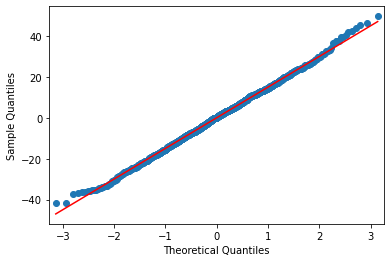

In [19]:
res = model.resid

fig = sm.qqplot(res,line='s')

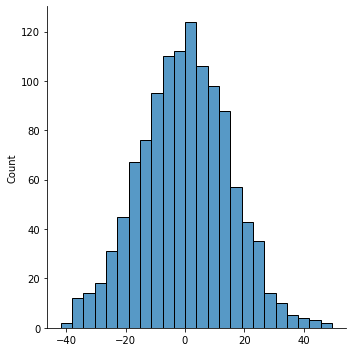

In [20]:
import seaborn as sns

sns.displot(res,bins='auto',kind='hist')

In [22]:
data = df.copy()
edlevel={'Less than HS':1,'HS':2,'Jr Coll':3,'Bachelor\'s':4,'Graduate':5}
data.EdLevel = [edlevel[item] for item in data.EdLevel]

In [24]:
data.EdLevel

0       1
1       1
2       1
3       1
4       1
       ..
1166    5
1167    5
1168    5
1169    5
1170    5
Name: EdLevel, Length: 1171, dtype: int64